In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from profiling.funs import load, numf_ls, batch_ls, hp_map

In [2]:
def corr(df, feat, title):
    plt.scatter(df[feat], df['avg_time_us'])
    plt.title(title, fontsize=14)
    plt.xlabel(feat, fontsize=14)
    plt.ylabel('avg_time (us)', fontsize=14)
    plt.grid(True)
    plt.show()

def plot_numf(df_big, layer):
    df = df_big[df_big['model_str']==layer]
    for nodes in [1,2,3]:
        for batch in batch_ls:
            for hp in hp_map[layer]:
                mask = (df['batch']==batch) & (df['hp']==hp) & (df['nodes']==nodes)
                title = '{}, nodes: {}, batch: {}, hp: {}'.format(layer, nodes, batch, hp)
                
                corr(df[mask], 'numf', title)


def plot_batch(df_big, layer):
    df = df_big[df_big['model_str']==layer]
    for nodes in [1,2,3]:
        for numf in numf_ls:
            for hp in hp_map[layer]:
                mask = (df.nodes==nodes)&(df.numf==numf)&(df.hp==hp)
                title = '{}, nodes: {}, numf: {}, hp: {}'.format(layer, nodes, numf, hp)
                
                corr(df[mask], 'batch', title)                

def plot_nodes(df_big, layer):
    df = df_big[df_big['model_str']==layer]
    for numf in numf_ls:
        for batch in batch_ls:
            for hp in hp_map[layer]:
                mask = (df.numf==numf)&(df.batch==batch)&(df.hp==hp)
                title = '{}, numf: {}, batch: {}, hp: {}'.format(layer, numf, batch, hp)
                
                corr(df[mask], 'nodes', title)

def plot(df, layer, feat):
    mask = df['model_str']==layer
    title = '{}, {}'.format(layer, feat)
    corr(df[mask], feat, title)

def give_train_data(df, layer):
    mask = df['model_str'] == layer
    df_ = df[mask].drop(columns='model_str')
    
    return df_.drop(columns='avg_time_us').to_numpy(), df_.avg_time_us.to_numpy()

In [3]:
df = load('datasets/ops_total.tflow')

In [128]:
X,y = give_train_data(df, 'conv2d')

In [129]:
from sklearn.preprocessing import PolynomialFeatures

In [123]:
X = PolynomialFeatures(degree=2).fit_transform(X)

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn import tree

# Sperate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [107]:
model = LinearRegression(fit_intercept=False)


In [78]:
model = LinearRegression()

In [131]:
model = tree.DecisionTreeRegressor()

In [132]:
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

0.9498217663731119

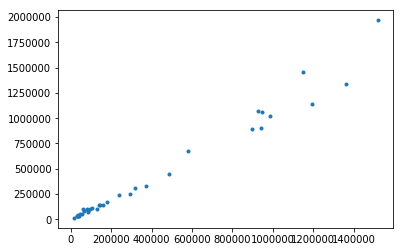

In [133]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt